# **Projeto de Credit Score | Processamento dos dados**


## Introdução
Neste projeto, abordamos um pipeline completo de Processamento e Pré-Modelagem de Dados, com foco na preparação robusta de conjuntos de dados para aplicações em aprendizado de máquina. O processo foi dividido em três etapas principais:
- **Entendimento e Tratamento Inicial dos Dados**: verificamos os tipos das variáveis e realizamos transformações quando necessário. Identificamos e tratamos dados faltantes, além de validar a consistência das variáveis categóricas, corrigindo possíveis erros de codificação.
- **Análise Exploratória (Univariada e Bivariada)**: executamos uma análise descritiva das variáveis numéricas e categóricas, com verificação de outliers e suas devidas tratativas. Finalizamos esta etapa com análises bivariadas para identificar padrões e potenciais correlações iniciais entre as variáveis.
- **Preparação Final para Modelagem**: nesta fase, aplicamos técnicas de correlação, balanceamento de classes, e transformação de variáveis categóricas para formato numérico adequado. Por fim, dividimos os dados em conjuntos de treino e teste, garantindo uma base sólida para a construção e avaliação de modelos preditivos.


O termo "credit score" se refere a uma pontuação numérica que representa a credibilidade de um indivíduo em termos de cumprimento de obrigações financeiras, como pagar contas de empréstimos, cartões de crédito, entre outros. Essa pontuação é calculada com base em diversas informações financeiras e de crédito do indivíduo, como histórico de pagamentos, níveis de endividamento, tempo de crédito, tipos de crédito utilizados, entre outros.

O objetivo de um modelo de credit score é prever o risco de um indivíduo se tornar inadimplente com suas obrigações financeiras. Em outras palavras, o modelo avalia a probabilidade de um indivíduo não cumprir com os pagamentos de empréstimos ou outros compromissos financeiros. Essa previsão é fundamental para instituições financeiras, como bancos e credores, na tomada de decisão sobre a concessão de crédito. Um modelo de credit score eficaz pode ajudar essas instituições a avaliar o risco de emprestar dinheiro a um determinado indivíduo e, assim, tomar decisões mais informadas sobre a aprovação ou negação de crédito, bem como sobre os termos e condições desses empréstimos.

In [1]:
#Bibliotecas necessárias para desenvolvimento do trabalho 

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import plotly.io as pio

from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [2]:
#Lembrem-se sempre de alterar a importação dos dados de acordo com o diretório de vocês.
df = pd.read_csv("CREDIT_SCORE_PROJETO_PARTE1.csv", delimiter=';')

#Verificando os tipos de dados 
df.head(10)

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25.0,Female,"50.000,00",Bachelor's Degree,Single,0,Rented,High
1,30.0,Male,"100.000,00",Master's Degree,Married,2,Owned,High
2,35.0,Female,"75.000,00",Doctorate,Married,1,Owned,High
3,40.0,Male,"125.000,00",High School Diploma,Single,0,Owned,High
4,45.0,Female,"100.000,00",Bachelor's Degree,Married,3,Owned,High
5,50.0,Male,"150.000,00",Master's Degree,Married,0,Owned,High
6,26.0,Female,"40.000,00",Associate's Degree,Single,0,Rented,Average
7,31.0,Male,"60.000,00",Bachelor's Degree,Single,0,Rented,Average
8,NaN,Female,"80.000,00",Master's Degree,Married,2,Owned,High
9,NaN,Male,"105.000,00",Doctorate,Single,0,Owned,High


Legenda dos dados:

*   **Age** : Idade dos nossos clientes.

*   **Income** : Salário Mensal.

*   **Gender** : Gênero.

*   **Education** : Nível de escolaridade dos clientes.

*   **Marital** : Status Civilmente.

*   **Number of Children** : Quantidade de filhos.

*   **Home** : Tipo de residência, alugada ou própria.

*   **Credit Score** : Nossa variável preditora, o score de crédito dos clientes.


# Etapa 1: Entendimento e Tratamento Inicial dos Dados.


Nesta primeira etapa, vamos realizar 3 objetivos principais:

1. Verificar os tipos de dados, fazendo as transformações quando necessário.
2. Verificar se temos colunas com dados faltantes. Caso existam colunas com dados faltantes será realizado o tratamento desses dados, excluindo ou substituindo esses valores e descrever o motivo desta ação.
3. Verificar se temos valores digitados de forma incorreta nas variáveis categóricas que necessitem de tratamento.

**Pré-processamento dos dados** 

Verificando dados para termos uma maior visibilidade do tamanho da base. Vamos iniciar essa etapa trazendo as informações da base, os tipos de dados e os dados únicos.

In [3]:
# Verificando tamanho da base de dados
df.shape

(164, 8)

In [4]:
# Trazendo informações gerais do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 130 non-null    float64
 1   Gender              164 non-null    object 
 2   Income              164 non-null    object 
 3   Education           164 non-null    object 
 4   Marital Status      164 non-null    object 
 5   Number of Children  164 non-null    int64  
 6   Home Ownership      164 non-null    object 
 7   Credit Score        164 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 10.4+ KB


#### Insights sobre informação dos dados

A base é pequena, por esse motivo vamos ter cuidados com todos os dados para aumentar a qualidade das informações contidas nela.
- Podemos confirmar que temos dados faltando na coluna `age`. deverá ser analisado para correção do problema.
- O tipo de dado também é uma questão a ser corrigida. devemos fazer a seguinte alteração:
    - A coluna `age` deve ser alterada do `tipo float` para o `tipo int`, pois não temos idades com ponto flutuante
    - A coluna `Income`, por se tratar de valores referentes a remuneração (dinheiro), deverá ser alterada de `object` para `float`

In [5]:
# Verificando dados únicos em cada coluna
valores_unicos = {col: df[col].unique() for col in df.columns}

# Exibindo os valores únicos
for col, values in valores_unicos.items():
    print(f"Valores únicos na coluna '{col}': \n{values}")

Valores únicos na coluna 'Age': 
[25. 30. 35. 40. 45. 50. 26. 31. nan 43. 48. 53. 29. 34. 39. 44. 49. 36.
 41. 46. 51. 27. 32. 37. 42. 47. 52. 28. 33. 38.]
Valores únicos na coluna 'Gender': 
['Female' 'Male']
Valores únicos na coluna 'Income': 
['50.000,00' '100.000,00' '75.000,00' '125.000,00' '150.000,00'
 '40.000,00' '60.000,00' '80.000,00' '105.000,00' '90.000,00' '135.000,00'
 '35.000,00' '55.000,00' '70.000,00' '95.000,00' '85.000,00' '30.000,00'
 '65.000,00' '115.000,00' '25.000,00' '45.000,00' '130.000,00'
 '155.000,00' '110.000,00' '140.000,00' '37.500,00' '57.500,00'
 '72.500,00' '32.500,00' '52.500,00' '67.500,00' '92.500,00' '82.500,00'
 '122.500,00' '27.500,00' '47.500,00' '62.500,00' '87.500,00' '77.500,00'
 '112.500,00' '117.500,00' '142.500,00' '160.000,00' '97.500,00'
 '145.000,00' '162.500,00' '120.000,00' '102.500,00' '137.500,00'
 '127.500,00' '82.000,00' '68.000,00']
Valores únicos na coluna 'Education': 
["Bachelor's Degree" "Master's Degree" 'Doctorate' 'High Sc

#### Insights sobre os dados das colunas
Analisando os dados os valores únicos de cada coluna, não identificamos a necessidade de corrigir nomenclatura. Os dados vão permanecer em inglês e com a primeira letra do nome da coluna, assim como os dados inalterados.

#### Tratamento Dados faltantes
Antes de começar a conversão dos dados da coluna `Age`, vamos validar a quantidade de dados faltantes e sua porcentagem


In [6]:
# Quantidade de dados faltantes da coluna 'Age'
df['Age'].isnull().sum()

# verificando a porcentagem de dados faltantes da coluna 'Age'
porcentagem_faltantes = df['Age'].isnull().mean() * 100
print(f"Porcentagem de dados faltantes na coluna 'Age': {porcentagem_faltantes:.2f}%")

Porcentagem de dados faltantes na coluna 'Age': 20.73%


Avaliando a porcentagem de dados faltantes na coluna `Age` e a quantidade de dados totais da base, vamos optar por substituir a os valores nulos pela média ou mediana. Vamos analisar os dados.

In [7]:
# Visão geral quantitativa da coluna 'Age'
print(f'A Média da coluna Age é :{df['Age'].mean()}')
print(f'A Mediana da coluna Age é :{df['Age'].median()}')
print(f'O Desvio Padrão da coluna Age é :{df['Age'].std()}')
print(f'O Valor minimo da coluna Age é :{df['Age'].min()}')
print(f'O Valor minimo da coluna Age é :{df['Age'].max()}')


A Média da coluna Age é :37.50769230769231
A Mediana da coluna Age é :36.0
O Desvio Padrão da coluna Age é :8.500110490705632
O Valor minimo da coluna Age é :25.0
O Valor minimo da coluna Age é :53.0


Por apresentar valores equilibrados e não apresentar discrepâncias, vamos utilizar a média para substituição de valores nulos. Valor 37

In [8]:
# Substituindo o valor faltante da coluna 'Age' pela média
df.fillna({'Age': df['Age'].mean()},inplace=True)
# Verificando novamente a quantidade de dados faltantes da coluna 'Age'
faltantes_novos = df['Age'].isnull().sum()
print(faltantes_novos)

0


In [9]:
# verificando dados do dataset atualizado
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 164 non-null    float64
 1   Gender              164 non-null    object 
 2   Income              164 non-null    object 
 3   Education           164 non-null    object 
 4   Marital Status      164 non-null    object 
 5   Number of Children  164 non-null    int64  
 6   Home Ownership      164 non-null    object 
 7   Credit Score        164 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 10.4+ KB


Agora podemos realizar a conversão dos dados 

In [10]:
# Convertendo a coluna 'Income' para o tipo float
df['Income'] = df['Income'].str.replace('.', '').str.replace(',', '.').astype(float)

# Verificando a conversão
print(df['Income'].dtype)

float64


In [11]:
# Convertendo os dados da coluna 'Age' para o tipo inteiro
df['Age']= df['Age'].astype(int)

# Verificando a conversão
print(df['Age'].dtype)

int64


In [12]:
# Trazendo informações gerais do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 164 non-null    int64  
 1   Gender              164 non-null    object 
 2   Income              164 non-null    float64
 3   Education           164 non-null    object 
 4   Marital Status      164 non-null    object 
 5   Number of Children  164 non-null    int64  
 6   Home Ownership      164 non-null    object 
 7   Credit Score        164 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 10.4+ KB


# Etapa 2: Análise Exploratória (Univariada e Bivariada).¶

Na segunda etapa vamos realizar uma análise exploratória dos dados. Serão realizadas atividades de análise univariada, assim como avaliação do dataframe para para validação de dados numéricos. 
Também será realizado avaliação das variáveis categóricas e avaliação de outliers.
também serão plotados gráficos para entender melhor as relações entre as variáveis


### 1. Análise univariada, aplicação da função describe e avaliação primária de presença de outliers com uso de gráficos de distribuição de dados

In [13]:
# Aplicando o método describe para obter estatísticas descritivas
df.describe()


,Age,Income,Number of Children
count,164.000000,164.000000,164.000000
mean,37.402439,83765.243902,0.652439
std,7.564625,32457.306728,0.883346
min,25.000000,25000.000000,0.000000
25%,31.750000,57500.000000,0.000000
50%,37.000000,83750.000000,0.000000
75%,43.000000,105000.000000,1.000000
max,53.000000,162500.000000,3.000000


#### Insights dados numéricos
- **Age**: A média é de aproximadamente 37,4 anos. Isso se mostra mais contundente nesta análise, porém já foi identificado no item anterior de validação. Existe um desvio padrão de 7,56 anos, indicando uma distribuição moderada de idades. A maioria das pessoas têm entre 31,75 e 43 anos. A variável `age` não será investigada, pois avaliando o conjunto de dados é natural que tenhamos uma variação no valor de idades e o valor máximo e mínimo estão dentro de um padrão normal.

- **Income**: A renda média é cerca de 83.765,24, mas há uma grande variabilidade, com um desvio padrão de 32.457,30. Isso sugere uma distribuição ampla, onde os 25% mais baixos ganham até 57.500 e os 25% mais altos ganham pelo menos R$105.000. Considerando o desvio padrão (std), é possível que seja encontrado outliers nesta variável

- **Number of Children**: - A média é baixa (0,65 filhos por pessoa), e a maioria das pessoas tem 0 ou 1 filho. Apenas um pequeno grupo tem 2 ou 3 filhos. Não será investigada a fundo, pois não é um valor que seja considerado um alerta ter o valor zero em uma população de dados pequena
Com esses números, podemos observar padrões populacionais e econômicos.

#### Insights por graficos 


In [24]:
# Criando função para plotar gráficos boxplot das variáveis numéricas

def plot_boxplot(df, column):
    """
    Plota boxplots para as colunas especificadas em um DataFrame.

    Args:
        df (pd.DataFrame): DataFrame contendo os dados.
        columns_name (list): Lista de nomes das colunas a serem plotadas.

    Returns:
        None
    """
    # montando o gráfico com plotly
    fig = px.box(df, y=column)
    fig.update_layout(
        title=f'Boxplot de {column}',
        yaxis_title='Valores',
        xaxis_title=column,
        showlegend=False
    )
    # Exibindo o gráfico
    fig.show()


In [23]:
# graficando boxplot para a coluna 'Age', 'Income' e 'Number of Children'

plot_boxplot(df, 'Age')
plot_boxplot(df, 'Income')
plot_boxplot(df, 'Number of Children')

#### Observação dos Gráficos 
- Pela projeção dos gráficos foi identificado um outlier na coluna `Number of Children`. Mas que não deve interferir na avaliação do contexto geral. 
- Dados da coluna `Income` não apresentaram valores forma do escopo da descrição estatística, conforme avaliação, não será validado nenhuma informação desta coluna.

### 2. Análise univariada para as variáveis categóricas, plotando graficos para comprender a distribuição das categorias

In [25]:
# Criando função para plotar grafico de barras das variáveis categóricas

def plot_bar(df, column_name):
    """
    Gera um gráfico de barras mostrando a distribuição de uma variável booleana no dataframe.

    Parâmetros:
    df (pd.DataFrame): DataFrame contendo a variável booleana.
    column_name (str): Nome da variável booleana a ser analisada.

    Retorno:
    Exibe um gráfico de barras com a distribuição da variável selecionada.
    """
    # Contagem de valores
    count_values = df[column_name].value_counts()
    print(f'Contagem de {column_name}:\n{count_values}')
    
    # Calcular a porcentagem
    percent_values = (count_values / count_values.sum()) * 100
    print(f'Percentual de {column_name}:\n{percent_values}')
    
    # Criando gráfico de barras
    fig = px.bar(
        count_values, 
        x=count_values.index, 
        y=count_values.values
    )
    
    fig.update_layout(
        title=f'Distribuição de {column_name}',
        xaxis_title=column_name,
        yaxis_title='Contagem',
        yaxis=dict(title='Contagem'),
        showlegend=False
    )
    
    fig.show()

In [26]:
# visualizando grafico de barra das colunas 'Gender','Education','Marital Status', 'Home Ownership' e 'Credit Score'
plot_bar(df,'Gender')
plot_bar(df,'Education')
plot_bar(df,'Marital Status')
plot_bar(df,'Home Ownership')
plot_bar(df,'Credit Score')

Contagem de Gender:
Gender
Female    86
Male      78
Name: count, dtype: int64
Percentual de Gender:
Gender
Female    52.439024
Male      47.560976
Name: count, dtype: float64


Contagem de Education:
Education
Bachelor's Degree      42
Master's Degree        36
Doctorate              31
High School Diploma    30
Associate's Degree     25
Name: count, dtype: int64
Percentual de Education:
Education
Bachelor's Degree      25.609756
Master's Degree        21.951220
Doctorate              18.902439
High School Diploma    18.292683
Associate's Degree     15.243902
Name: count, dtype: float64


Contagem de Marital Status:
Marital Status
Married    87
Single     77
Name: count, dtype: int64
Percentual de Marital Status:
Marital Status
Married    53.04878
Single     46.95122
Name: count, dtype: float64


Contagem de Home Ownership:
Home Ownership
Owned     111
Rented     53
Name: count, dtype: int64
Percentual de Home Ownership:
Home Ownership
Owned     67.682927
Rented    32.317073
Name: count, dtype: float64


Contagem de Credit Score:
Credit Score
High       113
Average     36
Low         15
Name: count, dtype: int64
Percentual de Credit Score:
Credit Score
High       68.902439
Average    21.951220
Low         9.146341
Name: count, dtype: float64


#### Insights de dados categóricos

- **Gender**: Podemos confirmar uma base de dados com maioria de mulheres. avaliando o gráfico podemos dizer que a distribuição dos dados é relativamente equilibrada, com 52,44% de mulheres e 47,56% de homens.

- **Education**: O retorno dos dados sobre a coluna educação, mostram que existe uma predominância de pessoas com ensino superior. Mais de 79% da base tem ensino superior.
Desta representação, predomina a divisão de ‘Bachelor's Degree’ com 25,61% da base. ‘Master's Degree’ e ‘Doctorate’ somam 40,85% da base. Essa informação reforça a questão da coluna ‘Income’, apresentando rendas pontualmente elevadas.

- **Marital Status**:Dados também demonstram um relativo equilíbrio dos status, dando predominância ao status ‘Married’ com 53,04% da base. status ‘Single’ apresenta 46,95% da base.

- **Home Ownership**: Nesta avaliação, temos uma base como predominância de pessoas com casa própria(Owned) atingindo mais de 67% da base, Esse dado também pode ser corroborado com a indicação dos dados da tabela 'Income’ e ‘Education’.

- **Credit Score**: Como era de se esperar, essa coluna apresenta uma distribuição não equilibrada. tendo uma predominância de pessoas com Credit Score alto(High) com quase 69% da base inclusa nesta categoria médio(Average) apresenta 21.95% da base e restante, 9% da base com Score baixo(Low). Podendo afirmar que existem relações entre renda, escolaridade e propriedades. 



### 3. Análise especifica de Outliers e Tratamento.

Sobre Outlier, foi encontrado apenas uma correspondência da coluna `Number of Children`, porém, não julgamos ser necessário realizar a tratativa deste item, pois apresenta apenas uma pequena parte considerando o tamanho da amostra, podemos ter algum desalinhamento na análise caso seja descartado essa informação ao tratado. Isso se deve ao fato de ser um evento natural. Para detalhar o caso, os dados estão sendo mostrado a seguir:

In [18]:
# Visualizando a distribuição da coluna 'Number of Children'
plot_bar(df,'Number of Children')

Contagem de Number of Children:
Number of Children
0    97
1    32
2    30
3     5
Name: count, dtype: int64
Percentual de Number of Children:
Number of Children
0    59.146341
1    19.512195
2    18.292683
3     3.048780
Name: count, dtype: float64


### 4. Realizando análise Bivariada em alguns questionamentos 


In [19]:
# Definição de função para plotar os gráficos de barras de relacionamento
def plot_bar_realacionamento(df, column_x, colunm_y):
    # Calcular a porcentagem de cada categoria
    df_grouped = df.groupby([column_x, colunm_y]).size().reset_index(name='count')
    total = df_grouped.groupby(colunm_y)['count'].transform('sum')
    df_grouped['percent'] = (df_grouped['count'] / total) * 100

    # Cria gráfico de barras empilhadas
    fig = px.bar(df_grouped, x=column_x, y='percent', color=colunm_y, barmode='stack', labels={column_x: column_x, 'percent': 'Porcentagem', colunm_y: colunm_y})

    fig.update_layout(title=f'Relação entre {column_x} e {colunm_y}', yaxis_title='Contagem|Porcentagem', legend_title=colunm_y)
    fig.show()

* **Existe relação entre a idade e o status civil?**


In [20]:
plot_bar_realacionamento(df, 'Age', 'Marital Status')

- Podemos notar que determinados estados civis são mais frequentes em faixas etárias específicas. Por exemplo, pessoas mais jovens tendem a ser solteiras, o que pode se notar da faixa entre 25 a 34 anos, enquanto pessoas mais velhas possuem maior representação nos estados casados (45 a 53 anos) ou pressupondo  divorciadas na faixa de 40 a 44 anos.
- Existe uma transição visível onde, conforme a idade avança, o número de pessoas solteiras diminui, enquanto o de casadas cresce. Isso sugere que o casamento ocorre mais frequentemente na idade adulta.
- A quantidade de pessoas divorciadas pode começar a aumentar em faixas etárias mais avançadas, sugerindo que há uma correlação entre idade e mudanças no estado civil ao longo da vida.
- Existe um claro destacamento na faixa etária dos 37 anos de idade onde onde foi aplicado a correção dos dados faltantes da base pela média dos dados da amostra. Isso tende a se repetir em outras análises envolvendo a idade.


* **Qual a relação entre o score de crédito e o nível de escolaridade?**

In [21]:
plot_bar_realacionamento(df, 'Credit Score', 'Education')

- Pessoas com maior grau de instrução, como Mestrado e Doutorado, tendem a ter scores de crédito mais altos. Isso pode ser atribuído a uma maior estabilidade financeira e conhecimento sobre gerenciamento de crédito, então apontando uma  tendência de aumento do score com maior escolaridade.
- Pessoas com Bacharelado apresentam um score intermediário, porém um pouco abaixo daqueles com pós-graduação, sugerindo que ainda pode haver variação na estabilidade financeira dentro desse grupo.
- Pessoas com Ensino Médio ou Diploma Associado mostram uma tendência a possuir scores menores, o que pode indicar maior dificuldade no acesso ao crédito ou menor experiência na gestão financeira.


* **O salário parece influenciar na idade?**

In [22]:
fig = px.scatter(df, x="Income", y="Age", color='Income', size='Income',  
                 title="Relação entre Idade e Renda",
                 labels={"Age": "Age", "Income": "Income"},)
fig.show()

- Observando o relacionamento, podemos validar uma tendência geral de aumento de renda em função da idade, podendo sugerir que a renda aumenta em função da experiência profissional e o tempo de atuação impactam nos ganhos do indivíduo.
- Pode existir uma tendência maior de crescimento da renda em uma faixa mais específica de idade. Entre 35 e 40 anos de idade, podendo ser em função de promoção, bônus ou maior estabilidade na carreira.
- Não podemos deixar de ressaltar a questão da média de idade, que pode inferir algum viés neste aspecto.
- Há um comportamento bem aparente no gráfico, pessoas mais jovens com rendas altas e pessoas mais velhas com rendas mais baixas. Isso pode ser reflexo de setores de trabalho, nível de escolaridade ou oportunidades individuais.



* **O salário parece influenciar no Score de Crédito?**

In [23]:
plot_bar_realacionamento(df,'Credit Score', 'Income')

- Existe uma clara relação entre a renda e o score de crédito, quando mais elevada for a renda maior é a score.
- As faixas de renda menores têm a menor avaliação, podendo estar relacionado a dificuldades de gestão dos recursos financeiros ou grau de instrução.
-  Existe uma clara divisão entre o score baixo e médio, essa divisão acontece pela elevação da renda após 37500 de renda do indivíduo. 
- Nem todas as pessoas com o renda mais alta tem o mesmo nível de score, sujeitando que a administração de bens e alguns fatores como, por exemplo, histórico de pagamentos sejam extremamente relevantes para essa divisão


* Clientes com casa própria tendem a ter um score mais alto?

In [24]:
plot_bar_realacionamento(df,'Credit Score', 'Home Ownership')

- Existe sim uma dependência relacional entre possuir uma residência a ser um locatário. Score de crédito mais alto é majoritariamente associado a pessoas que têm residência. 
- Pessoas que não possuem residência e tem alto score, denotam uma renda muito elevada. 
- Essa relação pode ser interpretada como uma avaliação de pagamentos em dia, assim como em casos de necessidade extrema, ter um imovel para a venda ou locação para ter uma renda extra.
- Pessoas que não possuem residência, estão classificadas com score médio ou baixo, tornando assim a variável possuir residência um  item classificatório para a avaliação.


####  Vamos avaliar a relação entre a variável número de filhos com a idade, escolaridade e score de crédito para validar alguma relação

- **Número de filhos X idade**


In [25]:
plot_bar_realacionamento(df,'Age', 'Number of Children')

- Existe uma tendência no aumento do número de filhos com a idade, indicando uma maturidade social para terem filhos.
- Temos uma faixa etária específica com maior número de filhos (45 anos com 3 filhos). indicando um período comum para terem filhos. Alguns fatos propiciam essa faixa etária como possíveis questões sociais  e econômicas ou até políticas de incentivo.
- Algumas faixas etárias não possuem filhos, o que pode estar relacionado a escolhas pessoais, fatores socioeconômicos ou até tendências modernas de adiamento da maternidade/paternidade.  



- **Relaçào entre Número de filhos e escolaridade**


In [26]:
plot_bar_realacionamento(df,'Education', 'Number of Children')

- Existe uma variação entre o número de filhos com a educação, pessoas com menor nível de instrução tendem a ter mais filhos em comparação a pessoas com maior grau de educação.
- A quantidade média de filhos por nível de graduação tende a ser menor que a média, podendo estar relacionado a planejamento financeiro, priorização de carreira e controle familiar.
- Indivíduos com Bacharelado têm um número médio de filhos mais alto do que outras faixas, indicando que muitos completam a graduação antes de iniciar famílias.


-  **Número de filhos x Score de credito**

In [27]:
plot_bar_realacionamento(df,'Credit Score', 'Number of Children')

- Essa é uma análise que não se pode realizar com apenas os dados indicados. é necessário ter um contexto mais amplo. Nota-se uma tendência natural que aponta a incidência de filhos com alto score.
- Aproximadamente Score baixo e médio é formado por clientes que não tem filhos. Tendo uma tendência a identificar a quantidade de filhos como um atributo sobre aspectos socioeconômicos.
- Mais de 90% dos cliente que possuem mais de um filho se enquadram no Credit Scor High. Esse dado pode sugerir que fatores além do número de filhos influenciam fortemente no crédito


# Etapa 3: Preparação Final para Modelagem

**A) Vamos começar pela análise de correlação, plote da forma que achar melhor a análise de correlação, seja pela tabela ou pelo gráfico da matriz.**

In [28]:
#seu código aqui
#Por ser um dataset pequeno, e neste momento, ter uma quantidade pequena de dados numericos, vamos utilizar o método corr() para verificar a correlação entre as variáveis numéricas
df.select_dtypes(include=['number']).corr()

,Age,Income,Number of Children
Age,1.000000,0.621599,0.071556
Income,0.621599,1.000000,0.084547
Number of Children,0.071556,0.084547,1.000000


**B) Você encontrou variáveis que tem uma média ou alta correlação? Se sim, quais? Te parece fazer sentido essas variáveis terem alta correlação? Justifique.**

- Podemos identificar uma correção média para alta entre as variáveis `Age` e `Income`.
- Essa correção já era evidenciada nas análises bivariadas, onde existe uma tendência do aumento de renda com a idade. Sugerindo que, no decorrer do tempo o indivíduo tenha uma renda maior em função de sua experiência profissional  
- Em contrapartida temos uma correlação muito fraca entre número de filhos, renda e idade.


**C) Temos muitos atributos categóricos nessa base, não? Vamos realizar a o tratamento desses atributos utilizando Label Encoder ou one hot. Após, exclua as colunas categóricas.**

Será aplicado a técnica de Label Encoder nas variáveis categóricas neste dataset, pois existe uma ordinalidade nos valores das colunas que pode ser melhor aproveitado em análises futuras.
As colunas transformadas serão:
- Gender
- Education
- Marital Status
- Home Ownership
- Credit Score

OBS: A conversão dos valores, por padrão da função Label Encode(), é por ordem alfabética.


In [30]:
#seu código aqui
# Criando uma instância do Label Encoder
label_encoder = LabelEncoder()

# Aplicando o Label Encoder para a coluna "Gender"
df['Gender Encoded'] = label_encoder.fit_transform(df['Gender'])

# Aplicando o Label Encoder para a coluna "Education"
df['Education Encoded'] = label_encoder.fit_transform(df['Education'])

# Aplicando o Label Encoder para a coluna "Marital Status"
df['Marital Encoded'] = label_encoder.fit_transform(df['Marital Status'])

# Aplicando o Label Encoder para a coluna "Home Ownership"
df['HomeOwnership Encoded'] = label_encoder.fit_transform(df['Home Ownership'])

# Aplicando o Label Encoder para a coluna "Credit Score"
df['CreditScore Encoded'] = label_encoder.fit_transform(df['Credit Score'])

# Exibindo o DataFrame atualizado com as colunas codificadas
print(df.head())

   Age  Gender    Income            Education Marital Status  \
0   25  Female   50000.0    Bachelor's Degree         Single   
1   30    Male  100000.0      Master's Degree        Married   
2   35  Female   75000.0            Doctorate        Married   
3   40    Male  125000.0  High School Diploma         Single   
4   45  Female  100000.0    Bachelor's Degree        Married   

   Number of Children Home Ownership Credit Score  Gender Encoded  \
0                   0         Rented         High               0   
1                   2          Owned         High               1   
2                   1          Owned         High               0   
3                   0          Owned         High               1   
4                   3          Owned         High               0   

   Education Encoded  Marital Encoded  HomeOwnership Encoded  \
0                  1                1                      1   
1                  4                0                      0   
2       

In [31]:
# Verificando dados únicos em cada coluna
valores_unicos = {col: df[col].unique() for col in df.columns}

# Exibindo os valores únicos
for col, values in valores_unicos.items():
    print(f"Valores únicos na coluna '{col}': \n{values}")

Valores únicos na coluna 'Age': 
[25 30 35 40 45 50 26 31 37 43 48 53 29 34 39 44 49 36 41 46 51 27 32 42
 47 52 28 33 38]
Valores únicos na coluna 'Gender': 
['Female' 'Male']
Valores únicos na coluna 'Income': 
[ 50000. 100000.  75000. 125000. 150000.  40000.  60000.  80000. 105000.
  90000. 135000.  35000.  55000.  70000.  95000.  85000.  30000.  65000.
 115000.  25000.  45000. 130000. 155000. 110000. 140000.  37500.  57500.
  72500.  32500.  52500.  67500.  92500.  82500. 122500.  27500.  47500.
  62500.  87500.  77500. 112500. 117500. 142500. 160000.  97500. 145000.
 162500. 120000. 102500. 137500. 127500.  82000.  68000.]
Valores únicos na coluna 'Education': 
["Bachelor's Degree" "Master's Degree" 'Doctorate' 'High School Diploma'
 "Associate's Degree"]
Valores únicos na coluna 'Marital Status': 
['Single' 'Married']
Valores únicos na coluna 'Number of Children': 
[0 2 1 3]
Valores únicos na coluna 'Home Ownership': 
['Rented' 'Owned']
Valores únicos na coluna 'Credit Score': 
[

In [32]:
# Excluindo colunas categóricas originais
df = df.drop(['Gender','Education','Marital Status', 'Home Ownership', 'Credit Score'], axis=1)

# Verificando o DataFrame atualizado
print(df)

     Age    Income  Number of Children  Gender Encoded  Education Encoded  \
0     25   50000.0                   0               0                  1   
1     30  100000.0                   2               1                  4   
2     35   75000.0                   1               0                  2   
3     40  125000.0                   0               1                  3   
4     45  100000.0                   3               0                  1   
..   ...       ...                 ...             ...                ...   
159   29   27500.0                   0               0                  3   
160   34   47500.0                   0               1                  0   
161   39   62500.0                   2               0                  1   
162   44   87500.0                   0               1                  4   
163   49   77500.0                   1               0                  2   

     Marital Encoded  HomeOwnership Encoded  CreditScore Encoded  
0       

**D) Vamos plotar novamente a correlação, agora observando com as variáveis categóricas. Identifique se temos novas variáveis com forte correlação.**

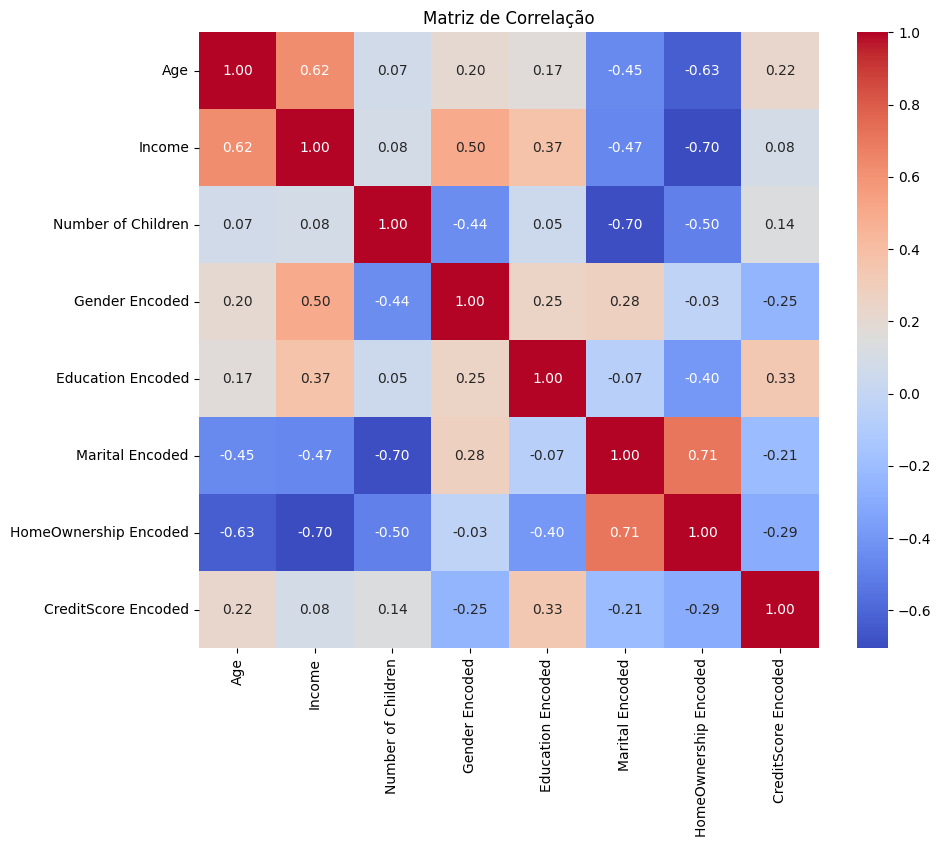

In [33]:
#seu código aqui

correlation_matrix = df.select_dtypes(include=['number']).corr()
# Plotar o mapa de calor da matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Matriz de Correlação')
plt.show()

- As variáveis `Age` e `Income` tem um correlação positiva média para forte, indicando que pessoas mais velhas têm maior renda
- `Number of Children` tem correlação negativa forte com `Marital Status` e correlação negativa média com `Home Ownership`, o que pode sugerir que pessoas casadas ou com imóveis tendem a ter menos filhos.
- `Education` tem correlação com o `Credit Score`, confirmando com as análises bivariadas que pessoas com maior nível de escolaridade têm maior score de crédito.
- `Marital Status` e `Home Ownership` possuem uma relação muito forte(0.71). Sugerindo grande correlação entre pessoas casadas, tendo maior probabilidade de ter imoveis.
- Ainda falando de `Home Ownership`, é apontado uma correlação forte negativa, que indica que pessoas mais jovens tendem a não possuir imóveis.

**F) Faça a separação da base em treino e teste e verifique utilizando shape:**

Como o objetivo de um modelo de credit score é prever o risco de um indivíduo se tornar inadimplente com suas obrigações financeiras. a coluna a ser predita é a `Credit Score`, nesse caso `CreditScore Encoded`

In [34]:
#seu código aqui
# Separando os dados em features (x) e target (y)
X = df.drop('CreditScore Encoded', axis=1)
y = df['CreditScore Encoded']


In [35]:
# separando os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [36]:
#seu código aqui
X_train

,Age,Income,Number of Children,Gender Encoded,Education Encoded,Marital Encoded,HomeOwnership Encoded
141,26,45000.0,0,0,0,1,1
117,29,27500.0,0,0,3,1,1
93,25,62500.0,0,0,1,1,1
133,29,68000.0,2,0,2,0,0
36,31,65000.0,0,1,1,1,1
...,...,...,...,...,...,...,...
71,46,97500.0,1,0,3,0,0
106,32,57500.0,0,1,0,1,1
14,37,70000.0,2,0,1,0,0
92,37,85000.0,1,0,2,0,0


In [37]:
X_test

,Age,Income,Number of Children,Gender Encoded,Education Encoded,Marital Encoded,HomeOwnership Encoded
135,25,55000.0,0,0,1,1,1
115,48,87500.0,1,0,2,0,0
131,26,55000.0,1,0,1,0,0
55,39,62500.0,2,0,1,0,0
95,35,90000.0,1,0,2,0,0
29,25,55000.0,0,0,1,1,1
157,48,82500.0,1,0,2,0,0
51,48,82500.0,1,0,2,0,0
101,36,95000.0,2,0,4,0,0
145,37,95000.0,1,0,3,0,0


In [38]:
y_train

141    0
117    2
93     0
133    0
36     0
      ..
71     1
106    0
14     1
92     1
102    1
Name: CreditScore Encoded, Length: 123, dtype: int64

In [39]:
y_test

135    0
115    1
131    0
55     1
95     1
29     0
157    1
51     1
101    1
145    1
19     0
85     2
15     1
66     1
24     2
30     1
132    1
105    2
152    1
16     1
75     1
18     2
12     2
9      1
31     1
155    1
98     1
56     1
134    1
160    0
139    1
78     1
60     1
84     1
2      1
94     1
45     1
42     0
69     1
153    2
26     1
Name: CreditScore Encoded, dtype: int64

In [40]:
print("Tamanho de X_train:", X_train.shape)
print("Tamanho de X_test:", X_test.shape)
print("Tamanho de y_train:", y_train.shape)
print("Tamanho de y_test:", y_test.shape)

Tamanho de X_train: (123, 7)
Tamanho de X_test: (41, 7)
Tamanho de y_train: (123,)
Tamanho de y_test: (41,)


**G) É hora de verificar se nossa coluna de Score de crédito está balanceada, verifique através de um gráfico e traga sua opinião acerca do balanceamento.**

In [41]:
df.head(10)

,Age,Income,Number of Children,Gender Encoded,Education Encoded,Marital Encoded,HomeOwnership Encoded,CreditScore Encoded
0,25,50000.0,0,0,1,1,1,1
1,30,100000.0,2,1,4,0,0,1
2,35,75000.0,1,0,2,0,0,1
3,40,125000.0,0,1,3,1,0,1
4,45,100000.0,3,0,1,0,0,1
5,50,150000.0,0,1,4,0,0,1
6,26,40000.0,0,0,0,1,1,0
7,31,60000.0,0,1,1,1,1,0
8,37,80000.0,2,0,4,0,0,1
9,37,105000.0,0,1,2,1,0,1


<Axes: xlabel='CreditScore Encoded'>

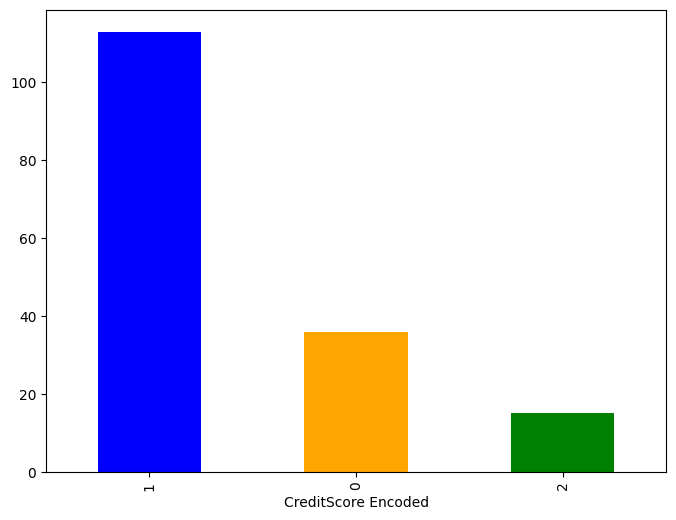

In [42]:
#seu código aqui
count_credit_score = df['CreditScore Encoded'].value_counts()
plt.figure(figsize=(8, 6))
count_credit_score.plot(kind='bar', color=['blue', 'orange', 'green'])

Como informado anteriormente, os valores atribuídos pela função Label Encode segurem a distribuição de forma alfabética, temos os valores:
- Zero (0): Average
- Um (1): High
- Dois (2): Low

Podemos identificar pelo gráfico anterior que a base é desbalanceada, com predomínio de clientes com o valor 1, que são clientes com score alto.

Conforme a validação a seguir, quase 70% dos dados reflete cliente com score high


In [43]:
# Calcular e imprimir as porcentagens dos valores na coluna 'CreditScore Encoded'
print((df['CreditScore Encoded'].value_counts(normalize=True) * 100))

CreditScore Encoded
1    68.902439
0    21.951220
2     9.146341
Name: proportion, dtype: float64


**H) Vamos realizar o balancecamento dos dados da coluna de credit score.**
Se lembre que realizazmos apenas para a base de treino.

In [45]:
#seu código aqui

# Criar uma instância do SMOTE
smote = SMOTE(random_state=42)

# Aplicar o SMOTE aos dados de treinamento (X_train, y_train)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Verificar a distribuição das classes após o balanceamento
print("Distribuição das classes após o balanceamento:")
print(y_train_balanced.value_counts())


Distribuição das classes após o balanceamento:
CreditScore Encoded
0    84
2    84
1    84
Name: count, dtype: int64


In [46]:
train_balance = y_train_balanced.value_counts()
print("Balanceamento em y_train:")
print(train_balance)

Balanceamento em y_train:
CreditScore Encoded
0    84
2    84
1    84
Name: count, dtype: int64


In [47]:
# salvando os dados balanceados em um novo DataFrame
y_train_balanced.to_csv('y_train_balanced.csv', index=False)

In [48]:
X_train_balanced.to_csv('X_train_balanced.csv', index=False)

In [49]:
y_test.to_csv('y_test.csv', index=False)

In [50]:
X_test.to_csv('X_test.csv', index=False)